<a href="https://colab.research.google.com/github/lmt822/Foodtrek/blob/master/520Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules and Data

In [ ]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn==0.10.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 14 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (771 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (Thi

In [ ]:
# data processing
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
from sklearn.utils import class_weight

# visualizations
import seaborn as sns
import matplotlib.pyplot as pyplt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

# statistics and modeling
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, fbeta_score, make_scorer, f1_score, jaccard_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
import autosklearn.classification

# sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

RANDOM_STATE = 10

import warnings
warnings.simplefilter("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1JY8LtZYus4p_ErebV2rp-M_7zMDnZM4W',
                                    dest_path='/content/creditcard.csv')

In [ ]:
# FILE_SOURCE = "/content/drive/MyDrive/creditcard.csv"

FILE_SOURCE = 'creditcard.csv'

raw_data = pd.read_csv(FILE_SOURCE)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

<b>Count missing value, finds none.</b>



In [ ]:
raw_data.isnull().sum(axis=0)/len(raw_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

# EDA

In [ ]:
1 - raw_data.Class.sum()/len(raw_data)

0.9982725143693799

99% not fraud, less than 1% fraud

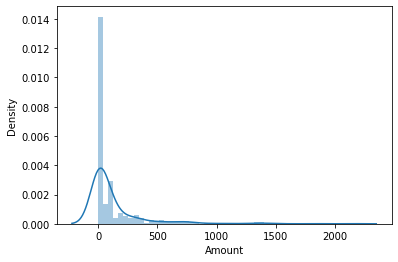

In [ ]:
sns.distplot(raw_data[raw_data.Class==1]['Amount'])

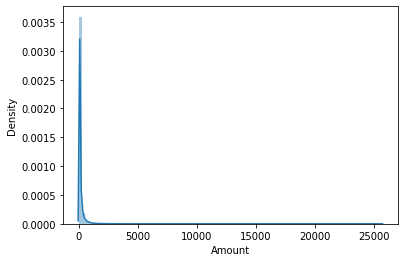

In [ ]:
sns.distplot(raw_data[raw_data.Class==0]['Amount'], bins=100)

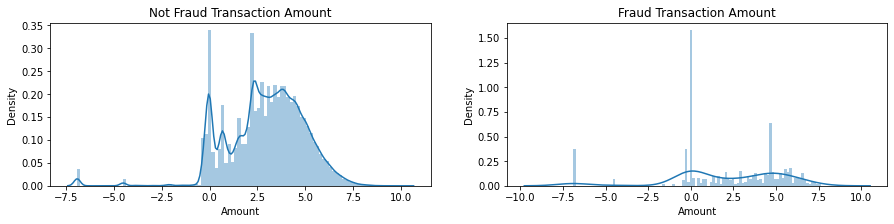

In [ ]:
fig, (ax0, ax1)= pyplt.subplots(1, 2, figsize=(15, 3))

sns.distplot(np.log(raw_data[raw_data.Class==0]['Amount']+0.001), bins=100, ax=ax0)
ax0.title.set_text('Not Fraud Transaction Amount')

sns.distplot(np.log(raw_data[raw_data.Class==1]['Amount']+0.001), bins=100, ax=ax1)
ax1.title.set_text('Fraud Transaction Amount')

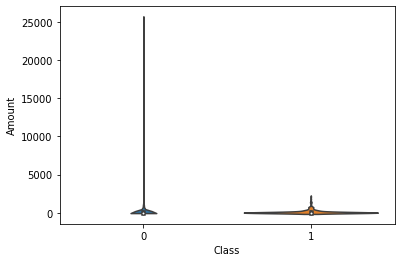

In [ ]:
sns.violinplot(x='Class',y='Amount',data=raw_data, showfliers=False)

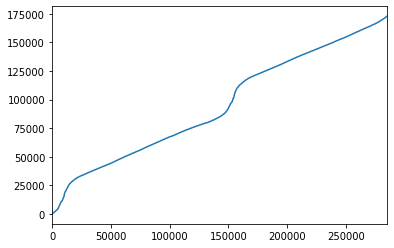

In [ ]:
raw_data.Time.plot()

# Feature Engineering
* Bin timestamp into hour of day since the dataset contains credit card trasaction within 3 days and we think certain hour of the day might have correlation with credit card fraud.

In [ ]:
raw_data['Time'] = (raw_data['Time']/3600)%24

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


#Correlation with target column

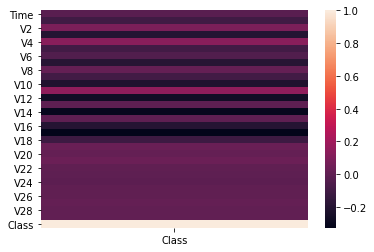

In [ ]:
corrMatrix = raw_data.corr()[['Class']]
sns.heatmap(corrMatrix, annot=False)
pyplt.show()

# Modeling

In [ ]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time2'],
      dtype='object')

In [ ]:
y = raw_data.Class 
X = raw_data.drop(labels='Class', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

In [ ]:
print("X_train shape is.{}".format(X_train.shape))
print("y_train shape is.{}".format(y_train.shape))
print("X_test shape is.{}".format(X_test.shape))
print("y_test shape is.{}".format(y_test.shape))

X_train shape is.(227845, 30)
y_train shape is.(227845,)
X_test shape is.(56962, 30)
y_test shape is.(56962,)


In [ ]:
# Machine learning training pipeline
def model_pipeline(X_train, y_train, X_test, y_test, model, sampler=None):
    '''
    Building up model pipelines with weighted classes
    
    X_train: training features with size (n_1,p)
    y_train: training labels with size (n_1,1)
    X_test: testing features with size (n_2, p)
    y_test: testing labels with size (n_2, p)
    
    model: estimator
    sampler: sampling method, None by default
    
    return: dictionary of performance metrics
    '''
    if sampler:
        #resample X_train, y_train
        X_train, y_train = sampler.fit_sample(X_train, y_train)
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, threshold = metrics.precision_recall_curve(y_test, predictions)
    f1score = fbeta_score(y_test, predictions, beta=1.0)
    fscore = fbeta_score(y_test, predictions, beta=0.5)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    roc_auc = roc_auc_score(y_test, predictions)
    precision_recall_auc = auc(recall, precision)
    jaccard = jaccard_score(y_test, predictions)
            
    #plot_confusion matrix
    title = type(model).__name__
    if sampler:
        title += type(sampler).__name__
    disp = plot_confusion_matrix(model, X_test, y_test)                     
    disp.ax_.set_title(title)
    
    performance = {'model':type(model).__name__, 'accuracy': accuracy,
                   'precision': precision, 'recall': recall, 'threshold':threshold,
                   'f1score': f1score, 'fscore':fscore,
                   'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                   'roc_auc': roc_auc, 'precision_recall_auc': precision_recall_auc,
                   'jaccard': jaccard}
    return performance

In [ ]:
under_sampler = RandomUnderSampler()
over_sampler = RandomOverSampler()
SMOTE_sampler = SMOTE()

### Random Forest

#### Balanced Class Weight

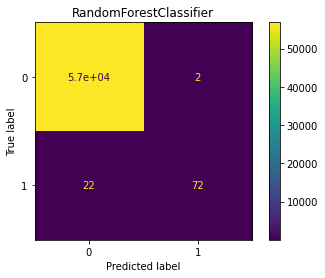

In [ ]:
model_RF1 = RandomForestClassifier(n_estimators=100,random_state=RANDOM_STATE, class_weight='balanced')
performance_RF_class_reweight = model_pipeline(X_train, y_train, X_test, y_test, model_RF1)

In [ ]:
performance_RF_class_reweight

{'accuracy': 0.9995786664794073,
 'f1score': 0.8571428571428571,
 'fn': 22,
 'fp': 2,
 'fscore': 0.9230769230769231,
 'jaccard': 0.75,
 'model': 'RandomForestClassifier',
 'precision': array([0.00165022, 0.97297297, 1.        ]),
 'precision_recall_auc': 0.8696583210876802,
 'recall': array([1.        , 0.76595745, 0.        ]),
 'roc_auc': 0.8829611388224167,
 'threshold': array([0, 1]),
 'tn': 56866,
 'tp': 72}

#### Random Under/ Over/ SMOTE Sampling

In [ ]:
RF = RandomForestClassifier(n_estimators=100,random_state=RANDOM_STATE)

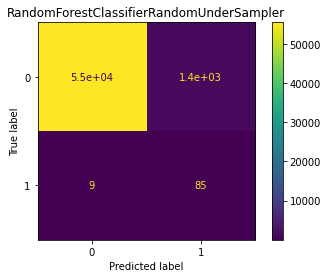

In [ ]:
performance_RF_under = model_pipeline(X_train, y_train, X_test, y_test, RF, under_sampler)

In [ ]:
performance_RF_under

{'accuracy': 0.9752115445384643,
 'f1score': 0.10745891276864727,
 'fn': 9,
 'fp': 1403,
 'fscore': 0.07029440952695996,
 'jaccard': 0.05678022712090848,
 'model': 'RandomForestClassifier',
 'precision': array([0.00165022, 0.05712366, 1.        ]),
 'precision_recall_auc': 0.4807684875665685,
 'recall': array([1.        , 0.90425532, 0.        ]),
 'roc_auc': 0.9397920754146595,
 'threshold': array([0, 1]),
 'tn': 55465,
 'tp': 85}

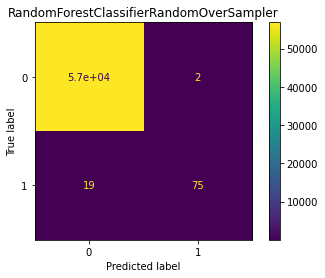

In [ ]:
performance_RF_over = model_pipeline(X_train, y_train, X_test, y_test, RF, over_sampler)

In [ ]:
performance_RF_over

{'accuracy': 0.9996313331694814,
 'f1score': 0.8771929824561404,
 'fn': 19,
 'fp': 2,
 'fscore': 0.9328358208955223,
 'jaccard': 0.78125,
 'model': 'RandomForestClassifier',
 'precision': array([0.00165022, 0.97402597, 1.        ]),
 'precision_recall_auc': 0.8861159350776542,
 'recall': array([1.        , 0.79787234, 0.        ]),
 'roc_auc': 0.8989185856309273,
 'threshold': array([0, 1]),
 'tn': 56866,
 'tp': 75}

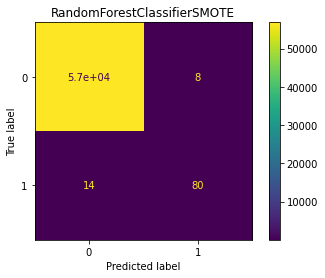

In [ ]:
performance_RF_over = model_pipeline(X_train, y_train, X_test, y_test, RF, SMOTE_sampler)

In [ ]:
performance_RF_over

{'accuracy': 0.9996137776061234,
 'f1score': 0.8791208791208791,
 'fn': 14,
 'fp': 8,
 'fscore': 0.8968609865470852,
 'jaccard': 0.7843137254901961,
 'model': 'RandomForestClassifier',
 'precision': array([0.00165022, 0.90909091, 1.        ]),
 'precision_recall_auc': 0.8802002583825778,
 'recall': array([1.        , 0.85106383, 0.        ]),
 'roc_auc': 0.9254615765662624,
 'threshold': array([0, 1]),
 'tn': 56860,
 'tp': 80}

In [ ]:
# Parameter Grid for cross-validated grid-search
n_estimators = [100,500,700,1000]
max_features = ['sqrt']
max_depth = [10,25,50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Set up parameter grid
para_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
sampler = RandomOverSampler()
X_trainNew, y_trainNew = sampler.fit_sample(X_train, y_train)

In [ ]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)

# Random search of parameters, using 4 fold cross validation, 
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=para_grid,
                               n_iter = 20, 
                               cv = 3, 
                               verbose=2, 
                               random_state=RANDOM_STATE)

best_rf = rf_random.fit(X_trainNew, y_trainNew)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.7min
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.6min
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.7min
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 


In [ ]:
best_rf.accuracy_score

NameError: ignored

### XGBoost

In [ ]:
X_train_xgboost = np.array(X_train.values)
X_test_xgboost = np.array(X_test.values)

#### No balancing

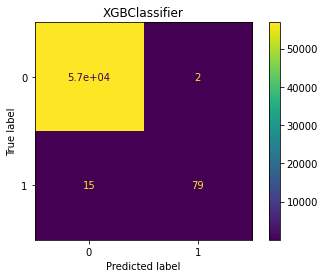

In [ ]:
xgboost_model = XGBClassifier(n_estimators=500, random_state=RANDOM_STATE, tree_method = "gpu_hist")
performance_xgboost_vanilla = model_pipeline(X_train, y_train, X_test, y_test, xgboost_model)

In [ ]:
performance_xgboost_vanilla

{'accuracy': 0.9997015554229135,
 'f1score': 0.9028571428571429,
 'fn': 15,
 'fp': 2,
 'fscore': 0.9449760765550241,
 'jaccard': 0.8229166666666666,
 'model': 'XGBClassifier',
 'precision': array([0.00165022, 0.97530864, 1.        ]),
 'precision_recall_auc': 0.9079987536702864,
 'recall': array([1.        , 0.84042553, 0.        ]),
 'roc_auc': 0.9201951813756081,
 'threshold': array([0, 1]),
 'tn': 56866,
 'tp': 79}

####Balanced Class Weight

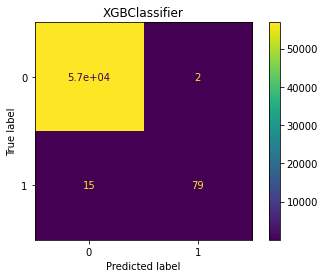

In [ ]:
xgboost_model = XGBClassifier(n_estimators=500, random_state=RANDOM_STATE, class_weight='balanced', tree_method = "gpu_hist")
performance_xgboost_balanced = model_pipeline(X_train, y_train, X_test, y_test, xgboost_model)

In [ ]:
performance_xgboost_balanced

{'accuracy': 0.9997015554229135,
 'f1score': 0.9028571428571429,
 'fn': 15,
 'fp': 2,
 'fscore': 0.9449760765550241,
 'jaccard': 0.8229166666666666,
 'model': 'XGBClassifier',
 'precision': array([0.00165022, 0.97530864, 1.        ]),
 'precision_recall_auc': 0.9079987536702864,
 'recall': array([1.        , 0.84042553, 0.        ]),
 'roc_auc': 0.9201951813756081,
 'threshold': array([0, 1]),
 'tn': 56866,
 'tp': 79}

#### Random Under/ Over/ SMOTE Sampling

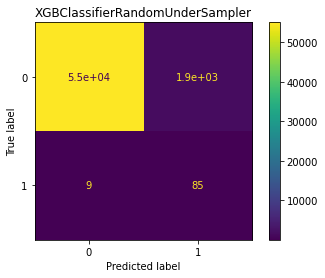

In [ ]:
xgboost_model = XGBClassifier(n_estimators=500, random_state=RANDOM_STATE, tree_method = "gpu_hist")
performance_xgboost_under = model_pipeline(X_train_xgboost, y_train, X_test_xgboost, y_test, xgboost_model, under_sampler)

In [ ]:
performance_xgboost_under

{'accuracy': 0.9670833187036972,
 'f1score': 0.08312958435207823,
 'fn': 9,
 'fp': 1866,
 'fscore': 0.053811091415548226,
 'jaccard': 0.04336734693877551,
 'model': 'XGBClassifier',
 'precision': array([0.00165022, 0.0435674 , 1.        ]),
 'precision_recall_auc': 0.4739903602759042,
 'recall': array([1.        , 0.90425532, 0.        ]),
 'roc_auc': 0.9357212447190134,
 'threshold': array([0, 1]),
 'tn': 55002,
 'tp': 85}

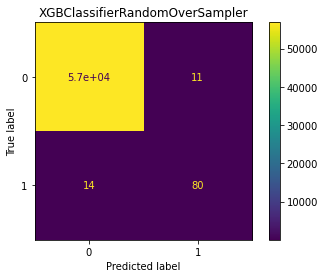

In [ ]:
performance_xgboost_over = model_pipeline(X_train_xgboost, y_train, X_test_xgboost, y_test, xgboost_model, over_sampler)

In [ ]:
performance_xgboost_over

{'accuracy': 0.9995611109160493,
 'f1score': 0.8648648648648649,
 'fn': 14,
 'fp': 11,
 'fscore': 0.8733624454148472,
 'jaccard': 0.7619047619047619,
 'model': 'XGBClassifier',
 'precision': array([0.00165022, 0.87912088, 1.        ]),
 'precision_recall_auc': 0.8652152433975627,
 'recall': array([1.        , 0.85106383, 0.        ]),
 'roc_auc': 0.9254351996935044,
 'threshold': array([0, 1]),
 'tn': 56857,
 'tp': 80}

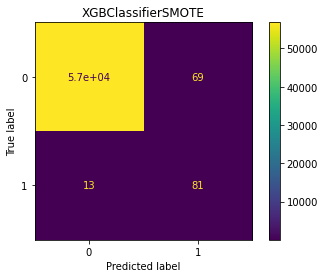

In [ ]:
performance_xgboost_SMOTE = model_pipeline(X_train_xgboost, y_train, X_test_xgboost, y_test, xgboost_model, SMOTE_sampler)

In [ ]:
performance_xgboost_SMOTE

{'accuracy': 0.9985604438046417,
 'f1score': 0.6639344262295082,
 'fn': 13,
 'fp': 69,
 'fscore': 0.5835734870317003,
 'jaccard': 0.49693251533742333,
 'model': 'XGBClassifier',
 'precision': array([0.00165022, 0.54      , 1.        ]),
 'precision_recall_auc': 0.7009651749916145,
 'recall': array([1.        , 0.86170213, 0.        ]),
 'roc_auc': 0.9302443957563539,
 'threshold': array([0, 1]),
 'tn': 56799,
 'tp': 81}

In [ ]:

xgboost_model_cv = XGBClassifier(
    tree_method = "gpu_hist",
    random_state=RANDOM_STATE, 
    eval_metric="aucpr"
)
# Create the grid search parameter grid and scoring funcitons
param_grid = {
    "learning_rate": [0.1, 0.01],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [2, 3, 4],
    "n_estimators": [500, 600, 700, 800],
    "reg_lambda": [1, 1.5, 2],
    "gamma": [0, 0.1, 0.3],
}
# create the Kfold object
num_folds = 5
kfold = StratifiedKFold(n_splits=num_folds, random_state=RANDOM_STATE)
# create the grid search object
n_iter=50
grid = RandomizedSearchCV(
    estimator=xgboost_model_cv, 
    param_distributions=param_grid,
    cv=kfold,
    scoring='f1',
    n_jobs=-1,
    n_iter=n_iter,
    refit="f1",
)
# fit grid search
best_model = grid.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
print(f'Best score: {best_model.best_score_}')
print(f'Best model: {best_model.best_params_}')

In [ ]:
pred_test = best_model.predict(X_test_xgboost)
pred_train = best_model.predict(X_trainNew)
print('Train F1 score: ', fbeta_score(y_trainNew, pred_train, beta=1))
print('Test F1 score: ', fbeta_score(y_test, pred_test, beta=1))

Train F1 score:  1.0
Test F1 score:  0.8307692307692307


### AutoML

In [ ]:
# AutoML pipeline
def automl_pipeline(X_train, y_train, X_test, y_test, sampler=None, time=30):
    '''
    Building up automl pipelines with weighted classes
    
    X_train: training features with size (n_1,p)
    y_train: training labels with size (n_1,1)
    X_test: testing features with size (n_2, p)
    y_test: testing labels with size (n_2, p)
    
    sampler: sampling method, None by default
    
    return: dictionary of performance metrics
    '''
    if sampler:
        # resample X_train, y_train
        X_train, y_train = sampler.fit_sample(X_train, y_train)
        X_test, y_test = np.array(X_test), np.array(y_test)

    
    automl = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=time,
        per_run_time_limit=int(time/10),
        #tmp_folder='/tmp/autosklearn_classification_example_tmp',
        #output_folder='/tmp/autosklearn_classification_example_out',
    )

    automl.fit(X_train, y_train)
    print(automl.show_models())
    predictions = automl.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, threshold = metrics.precision_recall_curve(y_test, predictions)
    f1score = fbeta_score(y_test, predictions, beta=1.0)
    fscore = fbeta_score(y_test, predictions, beta=0.5)
    cm = metrics.confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    roc_auc = roc_auc_score(y_test, predictions)
    precision_recall_auc = auc(recall, precision)
    jacard = jaccard_score(y_test, predictions)
            
    #plot_confusion matrix
    title = type(automl).__name__
    if sampler:
        title += type(sampler).__name__
    pyplt.figure(figsize=(6.4, 4.8))
    sns.heatmap(cm, annot=True, cmap='viridis')
    pyplt.xlabel('Predicted label')
    pyplt.ylabel('True label')
    pyplt.title(title)
    pyplt.show()
    
    performance = {'model':type(automl).__name__, 'accuracy': accuracy,
                   'precision': precision, 'recall': recall, 'threshold':threshold,
                   'f1score': f1score, 'fscore':fscore,
                   'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                   'roc_auc': roc_auc, 'precision_recall_auc': precision_recall_auc,
                   'jaccard': jaccard}
    return performance

#### Balanced Class Weight

In [ ]:
performance_automl = automl_pipeline(X_train, y_train, X_test, y_test, time=3600)

[(0.380000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'passive_aggressive', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'extra_trees_preproc_for_classification', 'classifier:passive_aggressive:C': 0.46057831591617715, 'classifier:passive_aggressive:average': 'False', 'classifier:passive_aggressive:fit_intercept': 'True', 'classifier:passive_aggressive:loss': 'hinge', 'classifier:passive_aggressive:tol': 0.04557857428827514, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.00027457445401600137, 'feature_preprocessor:extra_trees_preproc_for_classificatio

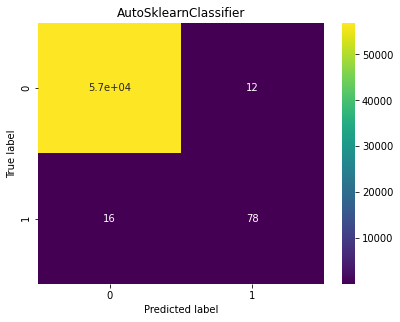

In [ ]:
performance_automl = automl_pipeline(X_train, y_train, X_test, y_test, time=1800)

In [ ]:
performance_automl

{'accuracy': 0.9995084442259752,
 'f1score': 0.8478260869565217,
 'fn': 16,
 'fp': 12,
 'fscore': 0.8590308370044055,
 'model': 'AutoSklearnClassifier',
 'precision': array([0.00165022, 0.86666667, 1.        ]),
 'precision_recall_auc': 0.8483673948614742,
 'recall': array([1.        , 0.82978723, 0.        ]),
 'roc_auc': 0.9147881095302447,
 'threshold': array([0, 1]),
 'tn': 56856,
 'tp': 78}

#### AutoML Under / Over / SMOTE Sampling

[(0.120000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'adaboost', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'liblinear_svc_preprocessor', 'classifier:adaboost:algorithm': 'SAMME.R', 'classifier:adaboost:learning_rate': 0.01074809653055298, 'classifier:adaboost:max_depth': 6, 'classifier:adaboost:n_estimators': 491, 'feature_preprocessor:liblinear_svc_preprocessor:C': 320.73907979377447, 'feature_preprocessor:liblinear_svc_preprocessor:dual': 'False', 'feature_preprocessor:liblinear_svc_preprocessor:fit_intercept': 'True', 'feature_preprocessor:liblinear_svc_preprocessor:intercept_scaling': 1, 'feature_pr

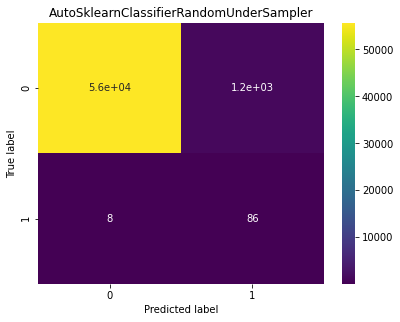

In [ ]:
performance_automl_under = automl_pipeline(X_train, y_train, X_test, y_test, sampler=under_sampler, time=1800)

In [ ]:
performance_automl_under

{'accuracy': 0.9788631017169341,
 'f1score': 0.125,
 'fn': 8,
 'fp': 1196,
 'fscore': 0.08234392952891612,
 'model': 'AutoSklearnClassifier',
 'precision': array([0.00165022, 0.06708268, 1.        ]),
 'precision_recall_auc': 0.4910583724177366,
 'recall': array([1.        , 0.91489362, 0.        ]),
 'roc_auc': 0.9469312285711293,
 'threshold': array([0, 1]),
 'tn': 55672,
 'tp': 86}

[(1.000000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'passive_aggressive', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'liblinear_svc_preprocessor', 'classifier:passive_aggressive:C': 7.491039171224502, 'classifier:passive_aggressive:average': 'True', 'classifier:passive_aggressive:fit_intercept': 'True', 'classifier:passive_aggressive:loss': 'squared_hinge', 'classifier:passive_aggressive:tol': 2.8058138048327884e-05, 'feature_preprocessor:liblinear_svc_preprocessor:C': 0.7754372809893839, 'feature_preprocessor:liblinear_svc_preprocessor:dual': 'False', 'feature_preprocessor:liblinear_svc_preprocessor:fit_intercept'

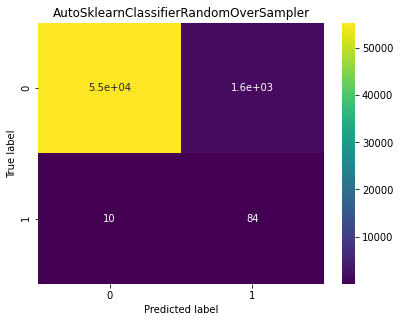

In [ ]:
performance_automl_over = automl_pipeline(X_train, y_train, X_test, y_test, sampler=over_sampler, time=1800)

In [ ]:
performance_automl_over

{'accuracy': 0.9721568765141674,
 'f1score': 0.09578107183580388,
 'fn': 10,
 'fp': 1576,
 'fscore': 0.06237006237006237,
 'model': 'AutoSklearnClassifier',
 'precision': array([0.00165022, 0.05060241, 1.        ]),
 'precision_recall_auc': 0.4721974932743651,
 'recall': array([1.        , 0.89361702, 0.        ]),
 'roc_auc': 0.9329518601494465,
 'threshold': array([0, 1]),
 'tn': 55292,
 'tp': 84}

[(1.000000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'passive_aggressive', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'liblinear_svc_preprocessor', 'classifier:passive_aggressive:C': 7.491039171224502, 'classifier:passive_aggressive:average': 'True', 'classifier:passive_aggressive:fit_intercept': 'True', 'classifier:passive_aggressive:loss': 'squared_hinge', 'classifier:passive_aggressive:tol': 2.8058138048327884e-05, 'feature_preprocessor:liblinear_svc_preprocessor:C': 0.7754372809893839, 'feature_preprocessor:liblinear_svc_preprocessor:dual': 'False', 'feature_preprocessor:liblinear_svc_preprocessor:fit_intercept'

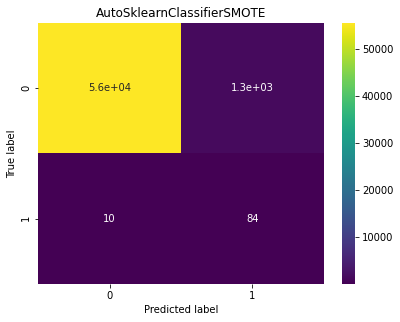

In [ ]:
performance_automl_smote = automl_pipeline(X_train, y_train, X_test, y_test, sampler=SMOTE_sampler, time=1800)

In [ ]:
performance_automl_smote

{'accuracy': 0.9766159896071065,
 'f1score': 0.11199999999999999,
 'fn': 10,
 'fp': 1322,
 'fscore': 0.07345225603357818,
 'model': 'AutoSklearnClassifier',
 'precision': array([0.00165022, 0.05974395, 1.        ]),
 'precision_recall_auc': 0.47676826569548625,
 'recall': array([1.        , 0.89361702, 0.        ]),
 'roc_auc': 0.9351851020429542,
 'threshold': array([0, 1]),
 'tn': 55546,
 'tp': 84}